### Data Loading

We load a file, which maps chemicals to their SMILES representations

In [1]:
import pandas as pd
import numpy as np
tab = pd.read_csv('/data/ZINC/ZINC_chemicals.tsv', delimiter='\t')
tab.head()

,Index,ZINCID,InChIKey,SMILES
0,1,ZINC00000010,DFDGRKNOFOJBAJ-LBPRGKRZSA-M,[O-]C(=O)C1=CC(=O)[C@](O1)(C)c1ccccc1
1,2,ZINC00000023,PAZJSJFMUHDSTF-CQSZACIVSA-O,CC(C)[NH2+]CC(COC1=CC=CC=C1CC=C)O
2,3,ZINC00000053,BSYNRYMUTXBXSQ-UHFFFAOYSA-M,CC(=O)Oc1ccccc1C(=O)[O-]
3,4,ZINC00000061,KPYSYYIEGFHWSV-QMMMGPOBSA-N,C1=CC(=CC=C1C(CC(=O)[O-])C[NH3+])Cl
4,5,ZINC00000071,RFRXIWQYSOIBDI-UHFFFAOYSA-N,CCC1=C(C2=CC=CC=C2O1)C(=O)C3=CC=C(C=C3)O


### SMILES embeddings

In [2]:
from preprocessing import SMILESPreprocessor
prep = SMILESPreprocessor(glove_components=50, min_df=4, max_df=1.)
processed_smiles = prep.fit(tab['SMILES'], window=6, epochs=100)
embedded_smiles = prep.idf_embed(processed_smiles)

Cleaning 12384 inputs...Done!
Training Tf-idf model...Done!
Training Glove model...Done!


### Evaluation of the algoritm

In [3]:
N_PROTEINS = 3500
N_CHEMICALS = 12384

#### Varying number of ligands per protein

The calculations below are costly. One epoch takes approximately 40 seconds. We perform 10 experiments with 10-fold cross validation each and training the model for 6 epochs each time. It adds up to over 6 hours.

In [4]:
from remap_utils import evaluate_dir, postprocess_results

In [5]:
ntnl_results = evaluate_dir(
    directory='/data/ZINC/NTNL_data/', users_embedding=embedded_smiles, n_items=N_PROTEINS,
    epochs=10, m=35, folds=10)

Experiment: N3upL1to5
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upL16to20
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2L11to15
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2L1to5
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upL11to15
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2L16to20
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upL6to10
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2L21more
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upL21more
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2L6to10
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9


In [6]:
postprocess_results(ntnl_results, 'number of ligands per protein')

,TPR_mean,TPR_sem,known_targets,number of ligands per protein
0,0.876144,0.037894,N2,L6to10
1,0.893205,0.018883,N3up,L16to20
2,0.839791,0.019140,N3up,L6to10
3,0.937895,0.016915,N2,L11to15
4,0.550745,0.021721,N3up,L1to5
5,0.952189,0.007368,N2,L21more
6,0.879040,0.019892,N3up,L11to15
7,0.535375,0.041517,N2,L1to5
8,0.881905,0.042543,N2,L16to20
9,0.933472,0.007090,N3up,L21more


#### Varying maximal similarity between chemicals

The experiment below (10 subsets, 10 folds 10 epochs each) takes approx. 11 hours.

In [5]:
ntmaxtc_results = evaluate_dir(
    directory='/data/ZINC/NTMaxTC_data/', users_embedding=embedded_smiles, n_items=N_PROTEINS,
    epochs=10, m=35, folds=10)

Experiment: N2Tc0.6to0.7
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2Tc0.8to0.9
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upTc0.8to0.9
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2Tc0.7to0.8
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upTc0.9to1
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upTc0.6to0.7
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2Tc0.9to1
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upTc0.49to0.6
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N3upTc0.7to0.8
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9
Experiment: N2Tc0.49to0.6
fold_0
fold_1
fold_2
fold_3
fold_4
fold_5
fold_6
fold_7
fold_8
fold_9


In [7]:
postprocess_results(ntmaxtc_results, 'chemical structural similarity')

,TPR_mean,TPR_sem,chemical structural similarity,known_targets
0,0.889787,0.009475,Tc0.6to0.7,N3up
1,0.877302,0.021216,Tc0.7to0.8,N3up
2,0.833711,0.060238,Tc0.8to0.9,N3up
3,0.950000,0.050000,Tc0.9to1,N2
4,0.927976,0.023970,Tc0.9to1,N3up
5,0.893020,0.024318,Tc0.49to0.6,N2
6,0.864442,0.020587,Tc0.49to0.6,N3up
7,0.893750,0.028028,Tc0.8to0.9,N2
8,0.907207,0.014033,Tc0.6to0.7,N2
9,0.900446,0.022203,Tc0.7to0.8,N2


#### ROC

Now, we plot the ROC curve averages over 10 fold cross validation

In [8]:
roc_curve = evaluate_dir(
    directory='/data/ZINC/cv/', users_embedding=embedded_smiles,
    n_items=N_PROTEINS, epochs=10, m=range(1, 31), folds=1)

Experiment: 8_10cv
fold_0


/usr/local/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Experiment: 5_10cv
fold_0
Experiment: 9_10cv
fold_0
Experiment: 6_10cv
fold_0
Experiment: 1_10cv
fold_0
Experiment: 7_10cv
fold_0
Experiment: 10_10cv
fold_0
Experiment: 3_10cv
fold_0
Experiment: 4_10cv
fold_0
Experiment: 2_10cv
fold_0


In [9]:
average_recall = np.mean([experiment['test_recall'].mean for _, experiment in roc_curve.items()], axis=0)

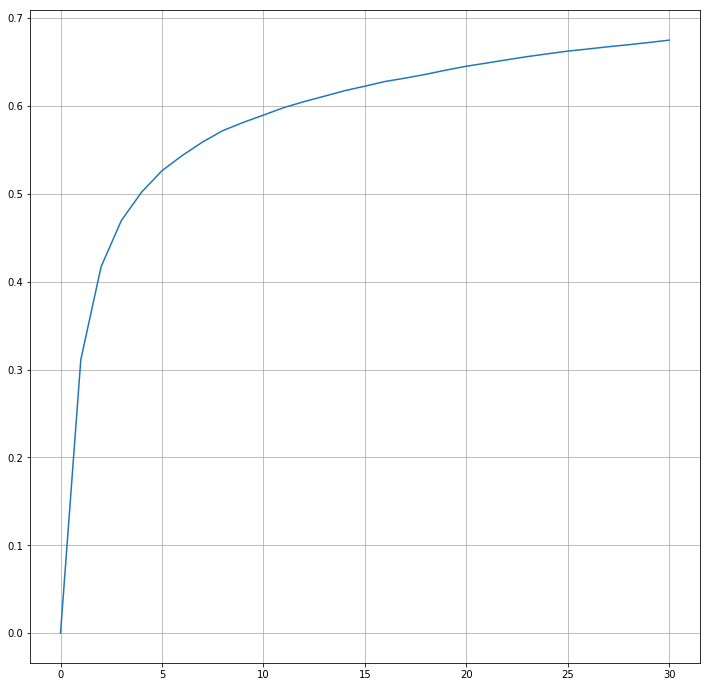

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.grid(which='both')
plt.plot(list(range(31)), [0] + list(average_recall))

### Cosine similarity vs TC coefficient

In [5]:
import scipy.io as sio
chem_sim = sio.loadmat('/data/ZINC/chem_chem_zinc.mat')['chem_chem_zinc']

We will train the model on full data. In order to do that, we choose a random train-test pair from `/data/cv/` directory and merge them to one set of ones

In [6]:
from remap_utils import _train_test_pairs, _merge
_, train_ones, test_ones =next(_train_test_pairs('/data/ZINC/cv', N_CHEMICALS))
all_ones = _merge(train_ones, test_ones)

Now, we train the model and predict the scores of interactions for all chemical-protein pairs

In [7]:
from models import BlockCoordinateAscent
from remap_utils import _transpose_ones

transposed_ones = _transpose_ones(all_ones, N_PROTEINS)  # in REMAP users and items are switched
model = BlockCoordinateAscent(
    transposed_ones, embedded_smiles.copy())
model.fit(n_epochs=10)
predictions = model.predict().T  # we transpose predictions to go back to original user-item setting

In [8]:
NO_PROTEINS_PER_CHEMICAL = 30

We take `NO_PROTEINS_PER_CHEMICAL` proteins (specifically, their IDs) with top scores (excluding the ones from the training set - by artificially setting their scores to negative infinity) per chemical as predictions

In [9]:
for i, one in enumerate(all_ones):
    predictions[i, one] = - np.inf
predictions = predictions.argsort()[:, -NO_PROTEINS_PER_CHEMICAL:]

Now, we compute the Tanimoto and cosine similarities of chemicals. We use `np.triu_indices` function to get values only above the diagonal as the matrices are symmetrical with 1. on diagonal

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

above_diagonal = np.triu_indices(N_CHEMICALS, k=1)

tc_coef = list(chem_sim[above_diagonal])
cos_sim = cosine_similarity(model.v)
cos_sim = list(cos_sim[above_diagonal])

We want to measure continuity of our model, by checking whether similar chemicals predict similar proteins. To measure it, we compute jaccard similarity of sets of indices of proteins predicted by for all chemicals.

In [11]:
def one_hot(predictions, n_items):
    n_users, n_predictions = predictions.shape
    result = np.zeros((n_users, n_items))
    result[np.repeat(np.arange(n_users), n_predictions), predictions.flatten()] = 1
    return result

def jaccard_similarity(predictions, n_items):
    one_hot_predictions = one_hot(predictions, n_items)
    intersection = np.dot(one_hot_predictions, one_hot_predictions.T)
    n_predictions = predictions.shape[1]
    jaccard = intersection / (2 * n_predictions - intersection)
    return jaccard

In [12]:
jac_sim = jaccard_similarity(predictions, N_PROTEINS)
jac_sim = list(jac_sim[above_diagonal])

We sample pairs to plot to speed up the computations

In [13]:
from random import sample
SAMPLE_SIZE = 1000000
indices = sample(list(range(len(tc_coef))), SAMPLE_SIZE)

In [14]:
sampled_tc_coef = [tc_coef[i] for i in indices]
sampled_cos_sim = [cos_sim[i] for i in indices]
sampled_jac_sim = [jac_sim[i] for i in indices]

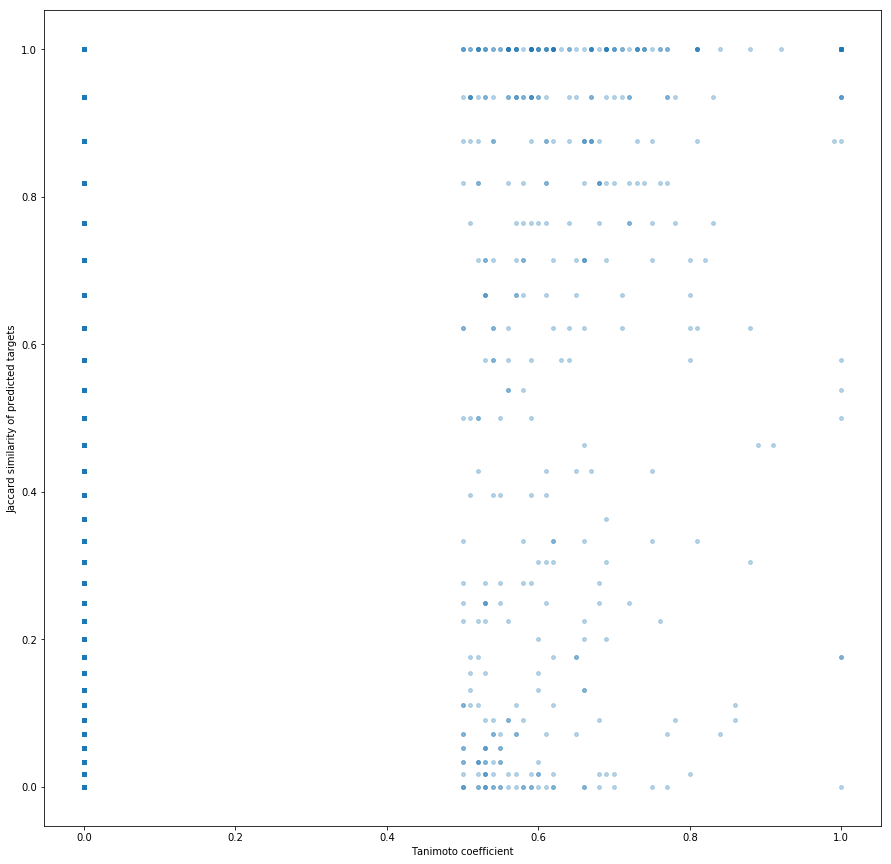

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.xlabel('Tanimoto coefficient')
plt.ylabel('Jaccard similarity of predicted targets')
plt.scatter(sampled_tc_coef, sampled_jac_sim, s=15., alpha=0.3)

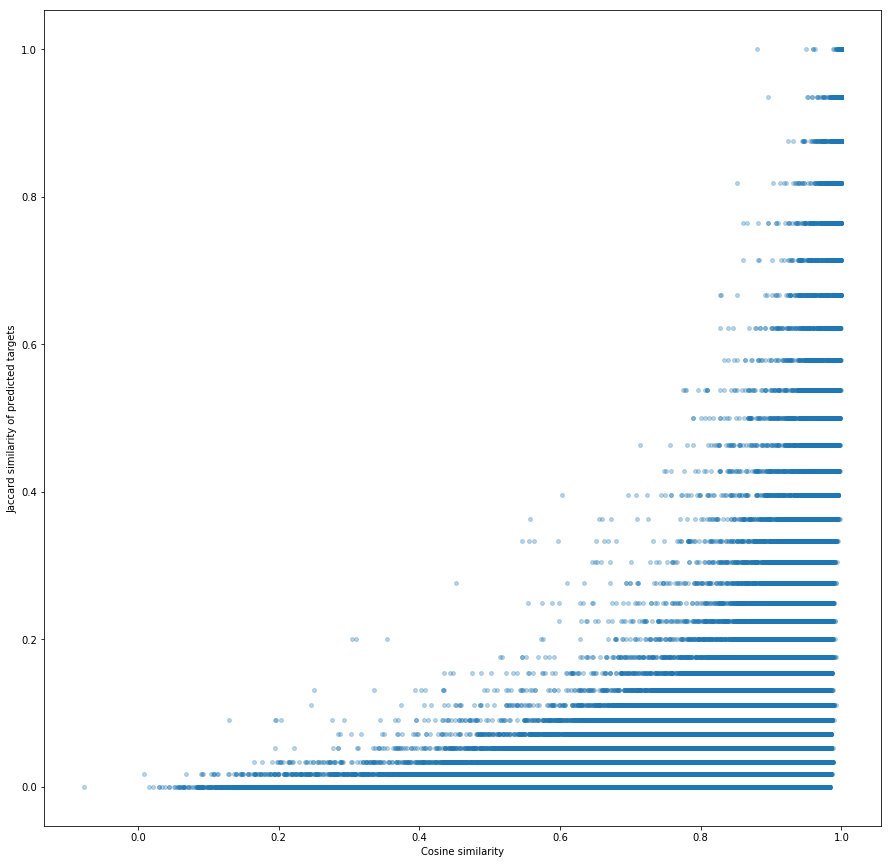

In [23]:
plt.figure(figsize=(15, 15))
plt.xlabel('Cosine similarity')
plt.ylabel('Jaccard similarity of predicted targets')
plt.scatter(sampled_cos_sim, sampled_jac_sim, s=15., alpha=0.3)

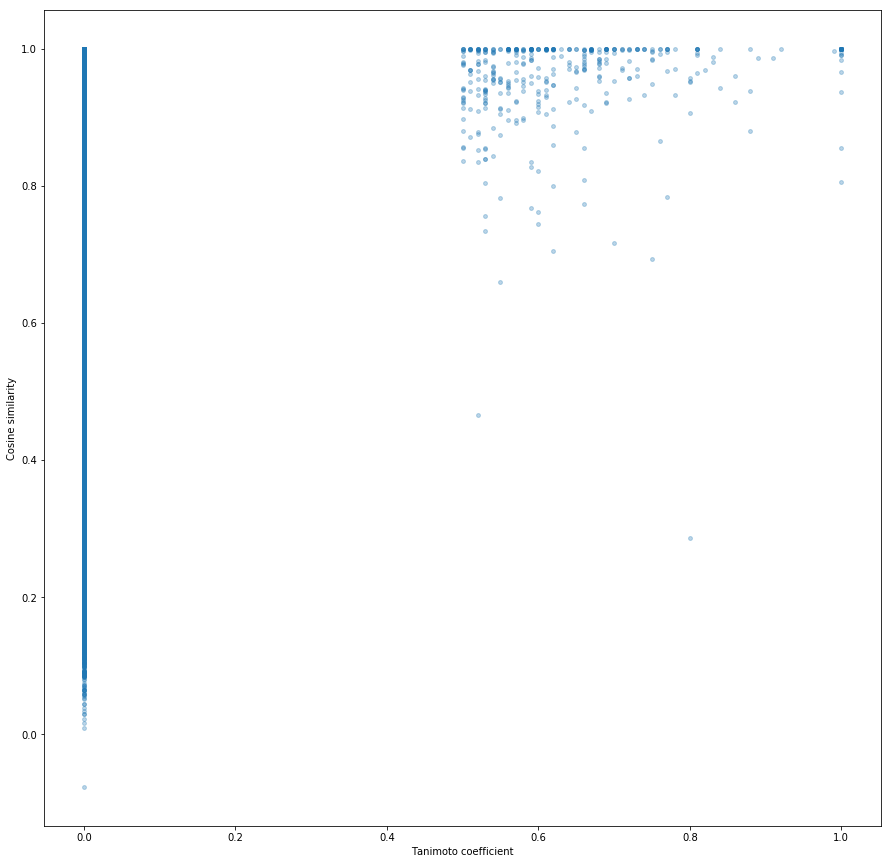

In [24]:
plt.figure(figsize=(15, 15))
plt.xlabel('Tanimoto coefficient')
plt.ylabel('Cosine similarity')
plt.scatter(sampled_tc_coef, sampled_cos_sim, s=15., alpha=0.3)